In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
HOME_WIN = 'home_win'
AWAY_WIN = 'away_win'
DRAW = 'draw'
HOME_GOALS = 'home_goals'
AWAY_GOALS = 'away_goals'

In [19]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'sport_odds_data.csv'
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
#print(df.head())  

In [20]:
## Filtering only past events

from datetime import datetime

# Convert the "commence_time" column to datetime
df['commence_time'] = pd.to_datetime(df['commence_time'])

# Get the current date without the time component
current_date = datetime.now().date()

# Extract the date component from the "commence_time" column
df['commence_date'] = df['commence_time'].dt.date

# Filter rows where "commence_date" is greater than the current date
filtered_df = df[df['commence_date'] < current_date]

# Drop the temporary "commence_date" column if you don't need it
filtered_df = filtered_df.drop(columns=['commence_date'])

# print(filtered_df)

In [21]:
LOW_ODD_LIMIT = 1.0
UPP_ODD_LIMIT = 4.0 
ODD_STEP_SIZE = 0.2

bins_number = int((UPP_ODD_LIMIT - LOW_ODD_LIMIT) / ODD_STEP_SIZE)

In [22]:
from odds_accuracy_utils import get_match_outcome, get_bin_index, fill_h2h_bins, fill_double_chance_bins, get_double_chance_odd

bins_labels = []
for i in range(0,bins_number):
    bins_labels.append(f"{round(LOW_ODD_LIMIT + i*ODD_STEP_SIZE, 1)}-{round(LOW_ODD_LIMIT + (i+1)*ODD_STEP_SIZE, 1)}")

d_c_in_bins = [] #Bins for 1-X results
for i in range (0, bins_number):
    d_c_in_bins.append([])

d_c_out_bins = [] #Bins for X-2 results
for i in range (0, bins_number):
    d_c_out_bins.append([])    

## Filteirng only head-to-head results
for index, row in filtered_df.iterrows():
    match_score = get_match_outcome(row)
    d_c_in_odd = get_double_chance_odd(float(row[HOME_WIN]), float(row[DRAW]))
    d_c_out_odd = get_double_chance_odd(float(row[AWAY_WIN]), float(row[DRAW]))
    # home_win_odd = float(row[HOME_WIN])
    # away_win_odd = float(row[AWAY_WIN])
    # draw_odd = float(row[DRAW])
    d_c_in_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, d_c_in_odd)
    d_c_out_bin_index = get_bin_index(LOW_ODD_LIMIT, UPP_ODD_LIMIT, ODD_STEP_SIZE, d_c_out_odd)

    # bins = fill_h2h_bins(bins, match_score, home_win_bin_index, away_win_bin_index, draw_bin_index
    #                  , home_win_odd, away_win_odd, draw_odd) 

    d_c_in_bins = fill_double_chance_bins(d_c_in_bins, match_score, d_c_in_bin_index, d_c_in_odd, True )
    d_c_out_bins = fill_double_chance_bins(d_c_out_bins, match_score, d_c_out_bin_index, d_c_out_odd, False )

In [24]:
print(d_c_in_bins)
for i in range(0,len(d_c_in_bins)):
    print(f"Bin n° {i+1} contains {len(d_c_in_bins[i])} events" )

[[[0.9570119802677942, True], [0.8823529411764706, True], [0.9871794871794873, True], [0.9418604651162791, False], [0.8370074882776961, True], [0.9142857142857143, True], [0.9352941176470588, True], [0.9118357487922704, True], [0.8446455505279035, True], [0.9248120300751882, True], [0.9166666666666667, True], [0.8727272727272728, True], [0.8804418453541261, True], [0.8976135488837567, True], [0.8832565284178185, True], [0.8951612903225805, False], [0.9476075915530606, True], [0.8344449384911813, True], [0.9226190476190476, True], [0.834658187599364, True], [0.9871794871794873, True], [0.8750379132544738, True], [0.8736942070275402, True], [0.9903147699757869, True], [0.9871794871794873, True], [0.951048951048951, True], [0.8840579710144928, False], [0.9118357487922704, True], [0.8758169934640524, True], [0.9166666666666667, True], [0.9735182849936947, True], [0.9735182849936947, True], [0.8483049523511951, True], [0.8750379132544738, True], [0.8976135488837567, False], [0.8672839506172

In [25]:
print(d_c_out_bins)
for i in range(0,len(d_c_out_bins)):
    print(f"Bin n° {i+1} contains {len(d_c_out_bins[i])} events" )

[[[0.8492063492063491, False], [0.943627450980392, True], [0.8642154024319628, False], [0.8888888888888888, True], [0.8405657344905175, True], [0.8488023952095809, False], [0.8496732026143791, False], [0.8630952380952381, True], [0.9047619047619047, True], [0.9166666666666667, True], [0.9142857142857143, True], [0.942857142857143, True], [0.8624708624708626, True], [0.875, True], [0.8624708624708626, True], [0.8560606060606062, True], [0.9142857142857143, True], [0.9027777777777779, True], [0.8630952380952381, True], [0.951048951048951, True], [0.8553791887125219, True], [0.9248120300751882, True], [0.8625525946704067, True], [0.8758169934640524, True], [0.8916900093370681, True], [0.8446455505279035, True], [0.9226190476190476, True], [0.8749999999999999, True], [0.8549019607843137, True], [0.9248120300751882, True], [0.8758169934640524, True], [0.9570119802677942, False]], [[0.7206632653061225, True], [0.7857142857142857, True], [0.7427487123881811, False], [0.8003048780487805, True]

In [31]:
d_c_in_odds_accuracies = []

for bin in d_c_in_bins:
    cum_exp_value = 0.
    cum_real_value = 0.
    for element in bin:
        cum_exp_value += element[0]
        if element[1]:
            cum_real_value+=1
    d_c_in_odds_accuracies.append([cum_exp_value, cum_real_value])        

# print(d_c_in_odds_accuracies)
# print(bins_labels)   

norm_d_c_in_odds_accuracies = []
for element in d_c_in_odds_accuracies:
    if (element[0] != 0): #In case no values exists in the bean, cum_real_value will be 0
        norm_d_c_in_odds_accuracies.append(element[1]/element[0])
    else:
        norm_d_c_in_odds_accuracies.append(1)   

In [32]:
d_c_out_odds_accuracies = []

for bin in d_c_out_bins:
    cum_exp_value = 0.
    cum_real_value = 0.
    for element in bin:
        cum_exp_value += element[0]
        if element[1]:
            cum_real_value+=1
    d_c_out_odds_accuracies.append([cum_exp_value, cum_real_value])   

# print(d_c_out_odds_accuracies)
# print(bins_labels)      

norm_d_c_out_odds_accuracies = []
for element in d_c_out_odds_accuracies:
    if (element[0] != 0): #In case no values exists in the bean, cum_real_value will be 0
        norm_d_c_out_odds_accuracies.append(element[1]/element[0])
    else:
        norm_d_c_out_odds_accuracies.append(1)   

# print(norm_odds_accuracies)         

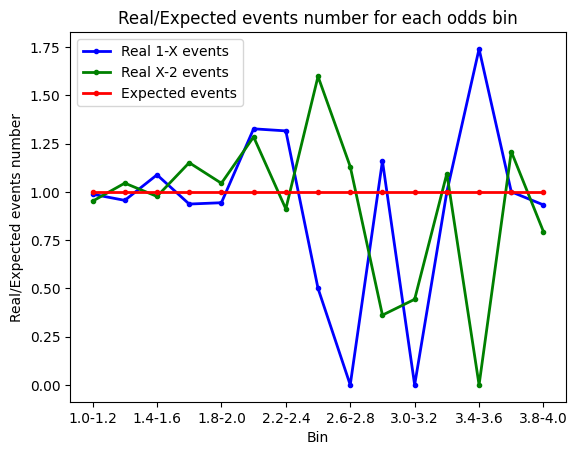

In [34]:
# Create a scatter plot with connecting lines for the first set of data
plt.plot(bins_labels, norm_d_c_in_odds_accuracies, color='blue', marker='.', linestyle='-', linewidth=2, label='Real 1-X events')

# Create a scatter plot with connecting lines for the first set of data
plt.plot(bins_labels, norm_d_c_out_odds_accuracies, color='green', marker='.', linestyle='-', linewidth=2, label='Real X-2 events')

# Create a scatter plot with connecting lines for the second set of data
plt.plot(bins_labels, np.ones(bins_number), color='red', marker='.', linestyle='-', linewidth=2, label='Expected events')


# Adding labels and title
plt.xlabel('Bin')
plt.ylabel('Real/Expected events number')
plt.title('Real/Expected events number for each odds bin')
plt.xticks(bins_labels[::2])
plt.legend()

# Show the plot
plt.show()